# Use Case
The use case for this capstone project is to develop a predictive model for data science salaries in 2023. The primary goal is to provide accurate salary estimates for data science professionals based on various factors, including years of experience, educational qualifications, location, industry, and specific skills. By leveraging historical salary data and considering current market trends, the model aims to assist both employers and job seekers in making informed decisions during salary negotiations. </br>
This predictive model will play a crucial role in addressing the dynamic nature of the job market, helping employers remain competitive in attracting top talent and empowering job seekers to navigate their career paths with realistic salary expectations in the ever-evolving landscape of data science in 2023.

# Data Set
Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

# Data Quality Assessment

In [ ]:
import pandas as pd

df = pd.read_csv('ds_salaries.csv')

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000



# Data Exploration

<ipython-input-5-60ef5627de8f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

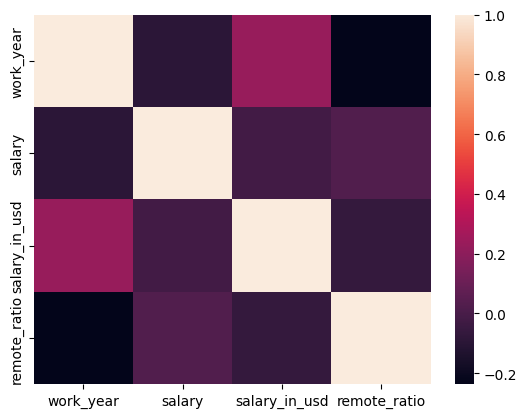

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr())

# Data Visualization

<Axes: xlabel='experience_level', ylabel='Count'>

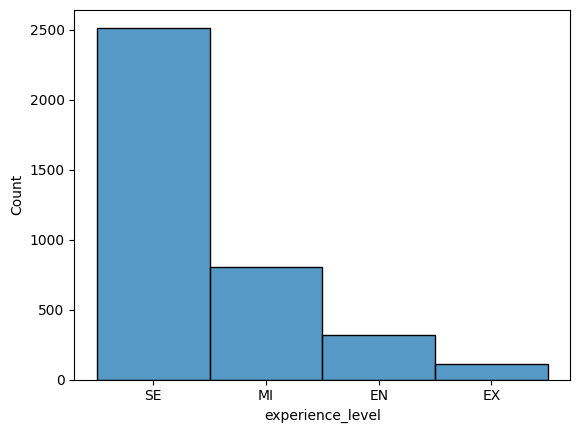

In [ ]:
sns.histplot(data=df['experience_level'])

<Axes: xlabel='salary_in_usd', ylabel='Count'>

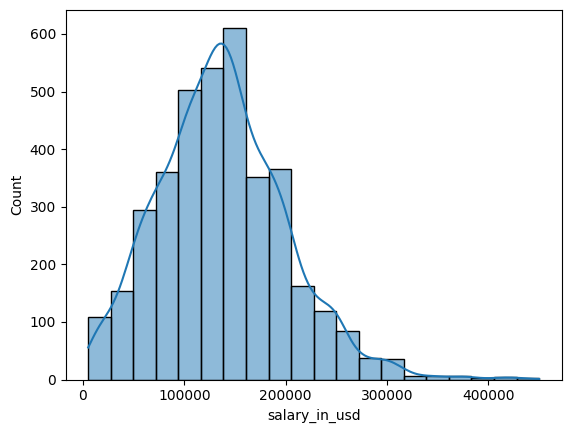

In [ ]:
sns.histplot(data=df['salary_in_usd'], bins=20, kde=True)

# Feature Engineering

In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Model Training

In [ ]:
X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X = enc.fit_transform(X)

In [ ]:
train_size = round(len(y) * 0.8)

In [ ]:
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
X_train.shape

(3004, 261)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

### Feedforward Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
fnn_reg = models.Sequential()
fnn_reg.add(layers.Dense(128, activation='relu', input_shape=(261,)))
fnn_reg.add(layers.Dense(64, activation='relu'))
fnn_reg.add(layers.Dense(1))

# Compile the model
fnn_reg.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
fnn_reg.summary()

# Train the model
fnn_reg.fit(X_train.todense(), y_train, epochs=50, batch_size=32, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               33536     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41857 (163.50 KB)
Trainable params: 41857 (163.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
76/76 [==============================] - 2s 13ms/step - loss: 24826705920.0000 - val_loss: 21850275840.0000
Epoch 2/50
76/76 [==============================] - 0s 6ms/step - loss: 24754075648.0000 - val_loss: 21696802816.0000
Epoch 3/50
76/76 [=========================

# Model Evaluation

In [ ]:
y_pred_rf = rf_reg.predict(X_test)
y_pred_fnn = fnn_reg.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_fnn = mean_absolute_error(y_test, y_pred_fnn)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_fnn = mean_squared_error(y_test, y_pred_fnn)

print('Mean Absolute Error:')
print('Random Forest:', mae_rf)
print('Feedforward Neural Network:', mae_fnn)
print('-*'*24 + '-')
print('Mean Squared Error:')
print('Random Forest:', mse_rf)
print('Feedforward Neural Network:', mse_fnn)

Mean Absolute Error:
Random Forest: 36031.19638452643
Feedforward Neural Network: 35032.87331960299
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Mean Squared Error:
Random Forest: 2616638992.1188564
Feedforward Neural Network: 2546672447.1855397


# Model Selection

Feedforward Neural Network model has better performance than Random Forest model so it should be selected.

# Final Result

From information such as experience level, job type, role, country, company size, etc. we can predict salary quite accurately. But it should only be viewed as a reference salary.